### 1. Import library

In [21]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, BatchNormalization, LeakyReLU
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.models import model_from_yaml

In [22]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [23]:
os.environ["CUDA_VISIBLE_DEVICES"] = "0" 

### 2. EDA

In [28]:
path = "../img/train"
class_names = ['battery', 'cardboard','clothes','contaminated_plastic','glass', 'human', 'keyboard','metal','mouse','pak','pants','paper', 'pen','phone', 'plastic','wrapper']
class_num = len(class_names)
print(class_num)
total = 0

for name in class_names:
    name_path = os.path.join(path, name)
    num = len(os.listdir(name_path))
    total += num
    print("Number of " + name + " image:" + str(num))

print("Total number of image: " + str(total))

16
Number of battery image:357
Number of cardboard image:402
Number of clothes image:332
Number of contaminated_plastic image:399
Number of glass image:459
Number of human image:448
Number of keyboard image:364
Number of metal image:342
Number of mouse image:328
Number of pak image:246
Number of pants image:258
Number of paper image:417
Number of pen image:390
Number of phone image:508
Number of plastic image:405
Number of wrapper image:340
Total number of image: 5995


In [26]:
from PIL import Image

for name in class_names:
    name_path = os.path.join(path, name)
    file_list = os.listdir(name_path)
    for n in file_list:
        file_path = os.path.join(name_path, n)
        try:
            img = Image.open(file_path)
        except:
            os.remove(file_path)

C:\Users\ABC\Anaconda3\lib\site-packages\PIL\Image.py:2685: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


### 3. Pre-processing

In [42]:
batch_size = 128
epochs = 30
IMG_HEIGHT = 150
IMG_WIDTH = 150
split = 0.2
total_val = total * split
total_train = total - total_val
print("Total number of training set: " + str(total_train))
print("Total number of validation set: " + str(total_val))

Total number of training set: 4796.0
Total number of validation set: 1199.0


In [43]:
data_generator = ImageDataGenerator(rescale=1./255,
                                    validation_split=split,
                                    rotation_range=45,
                                    width_shift_range=.15,
                                    height_shift_range=.15,
                                    horizontal_flip=True,
                                    zoom_range=0.5
                                   )

In [44]:
train_generator = data_generator.flow_from_directory(directory=path,
                                                    target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                    batch_size=batch_size,
                                                    class_mode='sparse',
                                                    shuffle=True,
                                                    subset='training')

validation_generator = data_generator.flow_from_directory(directory=path,
                                                    target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                    batch_size=batch_size,
                                                    class_mode='sparse',
                                                    shuffle=True,
                                                    subset='validation')

Found 4803 images belonging to 16 classes.
Found 1192 images belonging to 16 classes.


In [45]:
labels = (train_generator.class_indices)
print(labels)

{'battery': 0, 'cardboard': 1, 'clothes': 2, 'contaminated_plastic': 3, 'glass': 4, 'human': 5, 'keyboard': 6, 'metal': 7, 'mouse': 8, 'pak': 9, 'pants': 10, 'paper': 11, 'pen': 12, 'phone': 13, 'plastic': 14, 'wrapper': 15}


### 4. Visualisation

In [32]:
def plotImg(img, label):
    plt.figure(figsize=(10, 10))
    for i in range(25):
        plt.subplot(5, 5, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(img[i])
        plt.xlabel(class_names[int(label[i])])
    plt.show()

In [33]:
sample_img_train, sample_label_train = next(train_generator)

C:\Users\ABC\Anaconda3\lib\site-packages\PIL\Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


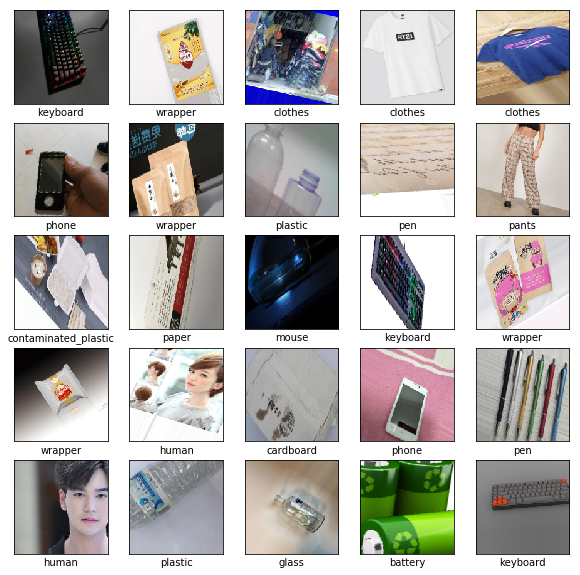

In [34]:
plotImg(sample_img_train, sample_label_train)

### 5. Model

In [46]:
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(256, activation='relu'),
    Dense(class_num, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [47]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch = total_train // batch_size,
    epochs = epochs,
    validation_data = validation_generator,
    validation_steps = total_val // batch_size
)

Epoch 1/30
 3/37 [=>............................] - ETA: 1:54 - loss: 2.8441 - acc: 0.0495

C:\Users\ABC\Anaconda3\lib\site-packages\PIL\Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


37/37 [==============================] - 198s 5s/step - loss: 2.6168 - acc: 0.1555 - val_loss: 2.5884 - val_acc: 0.2075
Epoch 2/30
37/37 [==============================] - 197s 5s/step - loss: 2.1540 - acc: 0.3206 - val_loss: 2.2338 - val_acc: 0.3073
Epoch 3/30
37/37 [==============================] - 187s 5s/step - loss: 1.9674 - acc: 0.3733 - val_loss: 2.1884 - val_acc: 0.3481
Epoch 4/30
37/37 [==============================] - 166s 4s/step - loss: 1.8241 - acc: 0.4170 - val_loss: 2.0768 - val_acc: 0.3455
Epoch 5/30
37/37 [==============================] - 167s 5s/step - loss: 1.7379 - acc: 0.4477 - val_loss: 2.0172 - val_acc: 0.3924
Epoch 6/30
37/37 [==============================] - 161s 4s/step - loss: 1.6675 - acc: 0.4635 - val_loss: 1.9429 - val_acc: 0.3872
Epoch 7/30
37/37 [==============================] - 1800s 49s/step - loss: 1.6213 - acc: 0.4850 - val_loss: 2.0224 - val_acc: 0.3741
Epoch 8/30
37/37 [==============================] - 71s 2s/step - loss: 1.5480 - acc: 0.4939

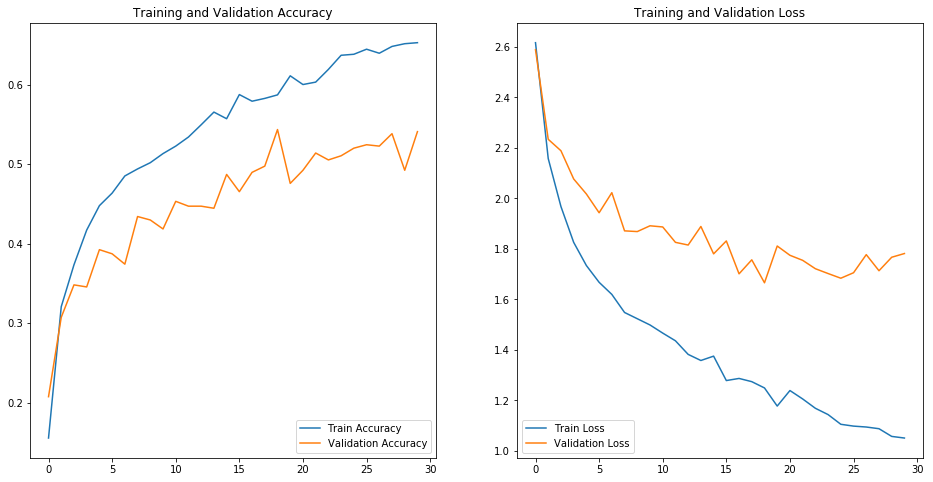

In [48]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='lower left')
plt.title('Training and Validation Loss')

plt.show()

### 6. Leaky ReLu

In [72]:
model = Sequential([
    Conv2D(16, 3, padding='same', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    LeakyReLU(alpha=0.1),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same'),
    LeakyReLU(alpha=0.1),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same'),
    LeakyReLU(alpha=0.1),
    MaxPooling2D(),
    Flatten(),
    Dense(256),
    LeakyReLU(alpha=0.1),
    Dense(9, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [73]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch = total_train // batch_size,
    epochs = epochs,
    validation_data = validation_generator,
    validation_steps = total_val // batch_size
)

Epoch 1/20
 6/26 [=====>........................] - ETA: 24s - loss: nan - acc: 0.0784

C:\Users\ABC\Anaconda3\lib\site-packages\PIL\Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


18/26 [===================>..........] - ETA: 10s - loss: nan - acc: 0.0769

KeyboardInterrupt: 

### 7. Export Model

In [50]:
# serialize model to YAML
model_yaml = model.to_yaml()
with open("model.yaml", "w") as yaml_file:
    yaml_file.write(model_yaml)

# serialize weights to HDF5
model.save_weights("model.h5")